In [ ]:
!gdown --id "1lQ0afgKv5OwTRaDbry00X7mrCnvdJV0x&confirm=t"

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lQ0afgKv5OwTRaDbry00X7mrCnvdJV0x&confirm=t
To: /content/anime-face.zip
100% 414M/414M [00:22<00:00, 18.4MB/s]


In [ ]:
!unzip anime-face.zip

In [ ]:
!mkdir ./dataset

!mv ./images ./dataset

(<matplotlib.image.AxesImage at 0x7f8c9cc535b0>, (62, 62, 3))

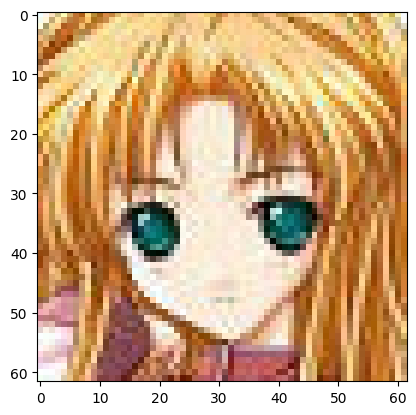

In [ ]:
import matplotlib.pyplot as plt

sample_img = plt.imread('./dataset/images/9997_2004.jpg')
plt.imshow(sample_img), sample_img.shape

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import MNIST, ImageFolder
from torch.utils.data import Dataset, DataLoader

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(64),
    torchvision.transforms.CenterCrop(64),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# ds = MNIST('./emnist', train= True, download = True, transform = transform)
ds = ImageFolder('./dataset', transform = transform)

dl = DataLoader(ds, batch_size = 128, shuffle = True)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


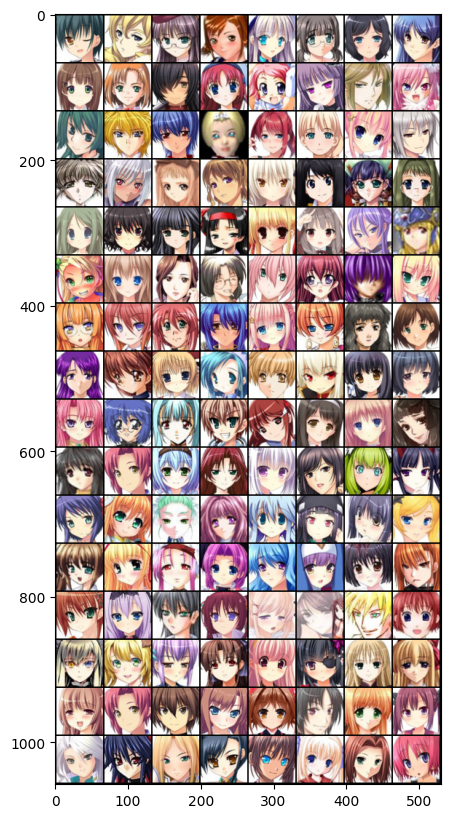

In [ ]:
import matplotlib.pyplot as plt

sample_images, sample_labels = next(iter(dl))

sample_grid = torchvision.utils.make_grid(sample_images, normalize=True)
plt.figure(figsize = (10, 10))
plt.imshow(sample_grid.permute(1, 2, 0))

print(sample_labels)

In [ ]:
from torchsummary import summary

generator = nn.Sequential(
  nn.ConvTranspose2d(100, 512, 4, 1, 0),
  nn.BatchNorm2d(512),
  nn.ReLU(),

  nn.ConvTranspose2d(512, 256, 4, 2, 1),
  nn.BatchNorm2d(256),
  nn.ReLU(),

  nn.ConvTranspose2d(256, 128, 4, 2, 1),
  nn.BatchNorm2d(128),
  nn.ReLU(),

  nn.ConvTranspose2d(128, 64, 4, 2, 1),
  nn.BatchNorm2d(64),
  nn.ReLU(),

  nn.ConvTranspose2d(64, 3, 4, 2, 1),
  nn.Tanh()
).to(device)

summary(generator, (100, 1, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1            [-1, 512, 4, 4]         819,712
       BatchNorm2d-2            [-1, 512, 4, 4]           1,024
              ReLU-3            [-1, 512, 4, 4]               0
   ConvTranspose2d-4            [-1, 256, 8, 8]       2,097,408
       BatchNorm2d-5            [-1, 256, 8, 8]             512
              ReLU-6            [-1, 256, 8, 8]               0
   ConvTranspose2d-7          [-1, 128, 16, 16]         524,416
       BatchNorm2d-8          [-1, 128, 16, 16]             256
              ReLU-9          [-1, 128, 16, 16]               0
  ConvTranspose2d-10           [-1, 64, 32, 32]         131,136
      BatchNorm2d-11           [-1, 64, 32, 32]             128
             ReLU-12           [-1, 64, 32, 32]               0
  ConvTranspose2d-13            [-1, 3, 64, 64]           3,075
             Tanh-14            [-1, 3,

In [ ]:
from torchsummary import summary

discriminator = nn.Sequential(
  nn.Conv2d(3, 64, 4, 2, 1),
  nn.BatchNorm2d(64),
  nn.ReLU(),

  nn.Conv2d(64, 128, 4, 2, 1),
  nn.BatchNorm2d(128),
  nn.ReLU(),

  nn.Conv2d(128, 256, 4, 2, 1),
  nn.BatchNorm2d(256),
  nn.ReLU(),

  nn.Conv2d(256, 512, 4, 2, 1),
  nn.BatchNorm2d(512),
  nn.ReLU(),

  nn.Conv2d(512, 1, 4, 1, 0),
  nn.Sigmoid()
).to(device)

summary(discriminator, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           3,136
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 16, 16]         131,200
       BatchNorm2d-5          [-1, 128, 16, 16]             256
              ReLU-6          [-1, 128, 16, 16]               0
            Conv2d-7            [-1, 256, 8, 8]         524,544
       BatchNorm2d-8            [-1, 256, 8, 8]             512
              ReLU-9            [-1, 256, 8, 8]               0
           Conv2d-10            [-1, 512, 4, 4]       2,097,664
      BatchNorm2d-11            [-1, 512, 4, 4]           1,024
             ReLU-12            [-1, 512, 4, 4]               0
           Conv2d-13              [-1, 1, 1, 1]           8,193
          Sigmoid-14              [-1, 

In [ ]:
disc_optimizer = torch.optim.Adam(discriminator.parameters(), lr = 0.0002, betas = (0.5, 0.999))
gen_optimizer = torch.optim.Adam(generator.parameters(), lr = 0.0002, betas = (0.5, 0.999))

criterion = nn.BCELoss()

In [ ]:
sample_noise_list = torch.randn((64, 100, 1, 1)).to(device)

def save_grid(v):
  arr = generator(sample_noise_list)
  gen_grid = torchvision.utils.make_grid(arr.detach().cpu(), normalize=True).permute(1, 2, 0)
  plt.figure(figsize = (10, 10))

  plt.imsave('./out/'+ v+'.jpg', gen_grid.numpy())

In [ ]:
n_epochs = 15
n_batches = len(dl)

gen_losses = []
disc_losses = []

for epoch in range(n_epochs):
  gen_loss_acc = 0.0
  disc_loss_acc = 0.0

  for idx, (images, _) in enumerate(dl):
    disc_optimizer.zero_grad()
    
    images = images.to(device)
    
    noise_list = torch.randn((images.shape[0], 100, 1, 1)).to(device)

    ones = torch.ones(images.shape[0], 1, 1, 1).to(device)
    zeros = torch.zeros(images.shape[0], 1, 1, 1).to(device)

    real_disc_pred = discriminator(images)
    fake_disc_pred = discriminator(generator(noise_list))

    real_disc_loss = criterion(real_disc_pred, ones)
    fake_disc_loss = criterion(fake_disc_pred, zeros)

    total_disc_loss = real_disc_loss + fake_disc_loss
    total_disc_loss.backward()
    disc_optimizer.step()

    ## Gen

    gen_optimizer.zero_grad()

    gen_images = generator(noise_list)
    gen_pred = discriminator(gen_images)
    gen_loss = criterion(gen_pred, ones)
    gen_loss.backward()
    gen_optimizer.step()

    with torch.no_grad():
      disc_loss_acc += (real_disc_loss.item() + fake_disc_loss.item())
      gen_loss_acc += gen_loss.item()

      if idx % 50 == 0 and idx != 0:
        print(f'Epoch: {epoch + 1}/{n_epochs}, Batch: {idx}/{n_batches}, disc_loss = {disc_loss_acc}, gen_loss = {gen_loss_acc}')
        save_grid(str(epoch)+'_'+str(idx))
        gen_losses.append(gen_loss_acc)
        disc_losses.append(disc_loss_acc)

        disc_loss_acc = 0.0
        gen_loss_acc = 0.0

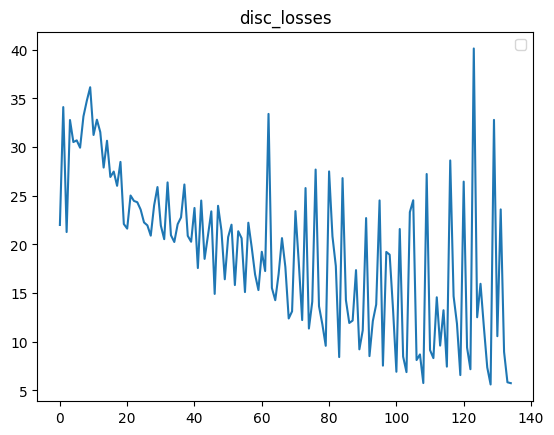

In [ ]:
plt.plot(disc_losses)
plt.title("disc_losses")
plt.legend()

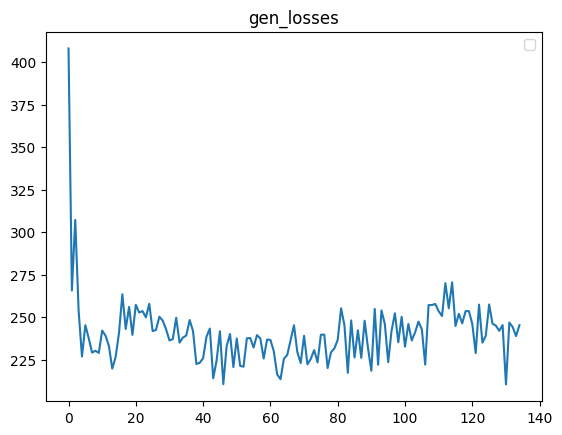

In [ ]:
plt.plot(gen_losses)
plt.title("gen_losses")
plt.legend()

In [ ]:
torch.save(generator.state_dict(), "./generator.pth")
torch.save(gen_optimizer.state_dict(), "./generator_optimizer.pth")

torch.save(discriminator.state_dict(), "./discriminator.pth")
torch.save(disc_optimizer.state_dict(), "./disc_optimizer.pth")

# Encoder

In [ ]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from torchsummary import summary

encoder = nn.Sequential(
  nn.Conv2d(3, 64, 4, 2, 1),
  nn.BatchNorm2d(64),
  nn.ReLU(),

  nn.Conv2d(64, 128, 4, 2, 1),
  nn.BatchNorm2d(128),
  nn.ReLU(),

  nn.Conv2d(128, 256, 4, 2, 1),
  nn.BatchNorm2d(256),
  nn.ReLU(),

  nn.Conv2d(256, 512, 4, 2, 1),
  nn.BatchNorm2d(512),
  nn.ReLU(),

  nn.Conv2d(512, 100, 4, 1, 0),
  nn.Tanh()
).to(device)

summary(encoder, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           3,136
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 16, 16]         131,200
       BatchNorm2d-5          [-1, 128, 16, 16]             256
              ReLU-6          [-1, 128, 16, 16]               0
            Conv2d-7            [-1, 256, 8, 8]         524,544
       BatchNorm2d-8            [-1, 256, 8, 8]             512
              ReLU-9            [-1, 256, 8, 8]               0
           Conv2d-10            [-1, 512, 4, 4]       2,097,664
      BatchNorm2d-11            [-1, 512, 4, 4]           1,024
             ReLU-12            [-1, 512, 4, 4]               0
           Conv2d-13            [-1, 100, 1, 1]         819,300
             Tanh-14            [-1, 10

In [ ]:
generator.load_state_dict(torch.load("./generator.pth"))
gen_optimizer.load_state_dict(torch.load("./generator_optimizer.pth"))

discriminator.load_state_dict(torch.load("./discriminator.pth"))
disc_optimizer.load_state_dict(torch.load("./disc_optimizer.pth"))

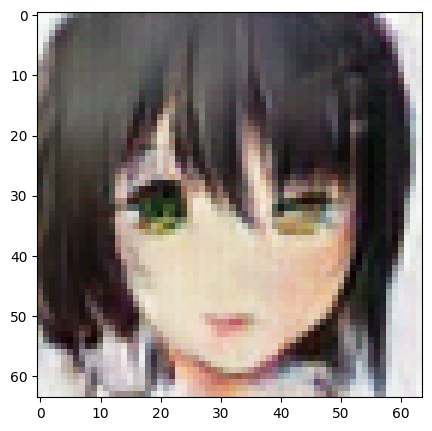

In [ ]:
sample_noise = torch.randn((1, 100, 1, 1)).to(device) # torch.load('sample.pt') # 
arr = generator(sample_noise)
test_grid = torchvision.utils.make_grid(arr.detach().cpu(), normalize=True).permute(1, 2, 0)
plt.figure(figsize = (5, 5))
plt.imshow(test_grid)

In [ ]:
torch.save(sample_noise, './sample.pt')

In [ ]:
print(discriminator)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (10): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU()
  (12): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1))
  (13): Sigmoid()
)


In [ ]:
discriminator[12] = nn.Conv2d(512, 100, 4, 1, 0)
discriminator[13] = nn.Tanh()

print(discriminator)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (10): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU()
  (12): Conv2d(512, 100, kernel_size=(4, 4), stride=(1, 1))
  (13): Tanh()
)


In [ ]:
generator.eval()
generator = generator.to(device)
discriminator = discriminator.to(device)

In [ ]:
disc_optimizer = torch.optim.Adam(discriminator.parameters(), lr = 0.0002, betas = (0.5, 0.999))
gen_optimizer = torch.optim.Adam(generator.parameters(), lr = 0.0002, betas = (0.5, 0.999))

criterion = nn.MSELoss()

In [ ]:
for name, param in discriminator.named_parameters():
  print(name, param.shape)

0.weight torch.Size([64, 3, 4, 4])
0.bias torch.Size([64])
1.weight torch.Size([64])
1.bias torch.Size([64])
3.weight torch.Size([128, 64, 4, 4])
3.bias torch.Size([128])
4.weight torch.Size([128])
4.bias torch.Size([128])
6.weight torch.Size([256, 128, 4, 4])
6.bias torch.Size([256])
7.weight torch.Size([256])
7.bias torch.Size([256])
9.weight torch.Size([512, 256, 4, 4])
9.bias torch.Size([512])
10.weight torch.Size([512])
10.bias torch.Size([512])
12.weight torch.Size([100, 512, 4, 4])
12.bias torch.Size([100])


In [ ]:
for epoch in range(100):
  for idx in range(50):
    disc_optimizer.zero_grad()
    noise_list = torch.randn((64, 100, 1, 1)).to(device)
    gen_images = generator(noise_list)
    disc_pred = discriminator(gen_images)
    disc_loss = criterion(disc_pred, noise_list)
    disc_loss.backward()
    disc_optimizer.step()

    print(f'Epoch: {epoch + 1}/{3}, Batch: {idx}/{50}, loss = {disc_loss.item()}')

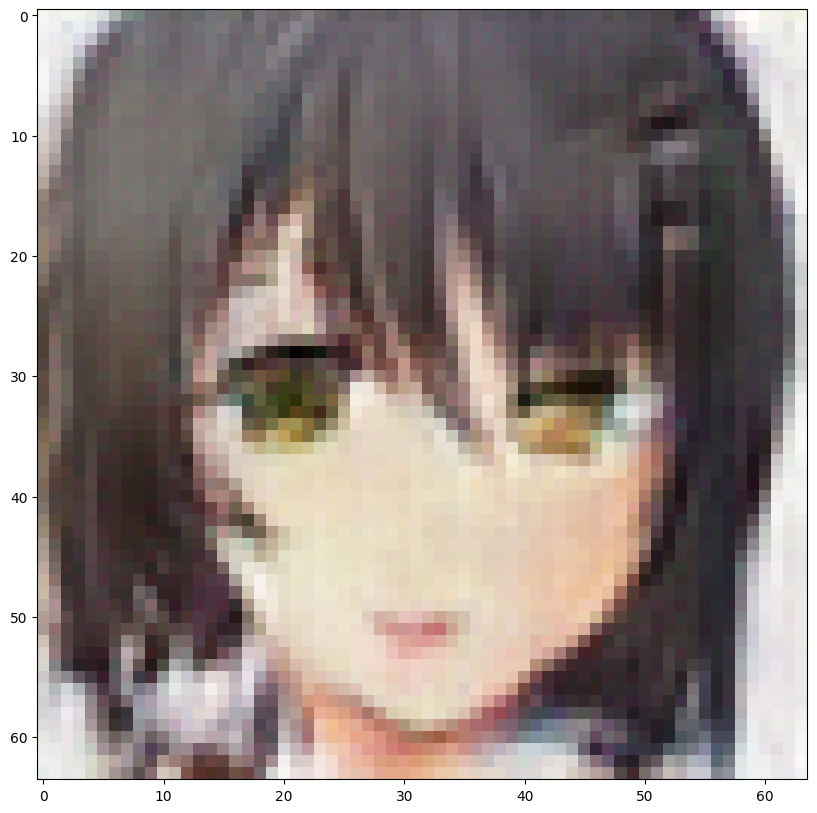

In [ ]:
ng = generator(discriminator(arr))

test_grid = torchvision.utils.make_grid(ng.detach().cpu(), normalize=True).permute(1, 2, 0)
plt.figure(figsize = (10, 10))
plt.imshow(test_grid)